#Libraries

In [50]:
import pandas as pd
import numpy as np
import cv2
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import keras
import tensorflow as tf
import matplotlib.pyplot as plt


#Read the Dataset and encode the Labels

In [10]:
dataset_path = "/content/drive/MyDrive/Dataset/Dataset.csv"
images_path = "/content/drive/MyDrive/Dataset/Faces/"

data = pd.read_csv(dataset_path)

x = []
y = []

for index, row in data.iterrows():
    image_path = os.path.join(images_path, row['id'])
    image = cv2.imread(image_path)
    x.append(image)
    y.append(row['label'])

x = np.array(x)
y = np.array(y)

In [11]:
label_list = set(y)
label_list

{'Akshay Kumar',
 'Alexandra Daddario',
 'Alia Bhatt',
 'Amitabh Bachchan',
 'Andy Samberg',
 'Anushka Sharma',
 'Billie Eilish',
 'Brad Pitt',
 'Camila Cabello',
 'Charlize Theron',
 'Claire Holt',
 'Courtney Cox',
 'Dwayne Johnson',
 'Elizabeth Olsen',
 'Ellen Degeneres',
 'Henry Cavill',
 'Hrithik Roshan',
 'Hugh Jackman',
 'Jessica Alba',
 'Kashyap',
 'Lisa Kudrow',
 'Margot Robbie',
 'Marmik',
 'Natalie Portman',
 'Priyanka Chopra',
 'Robert Downey Jr',
 'Roger Federer',
 'Tom Cruise',
 'Vijay Deverakonda',
 'Virat Kohli',
 'Zac Efron'}

In [12]:
label_dict = {}

for i,label in enumerate(label_list):
  label_dict[label] = i

label_dict

{'Camila Cabello': 0,
 'Henry Cavill': 1,
 'Natalie Portman': 2,
 'Brad Pitt': 3,
 'Margot Robbie': 4,
 'Hrithik Roshan': 5,
 'Roger Federer': 6,
 'Zac Efron': 7,
 'Billie Eilish': 8,
 'Courtney Cox': 9,
 'Hugh Jackman': 10,
 'Anushka Sharma': 11,
 'Kashyap': 12,
 'Claire Holt': 13,
 'Priyanka Chopra': 14,
 'Akshay Kumar': 15,
 'Tom Cruise': 16,
 'Amitabh Bachchan': 17,
 'Charlize Theron': 18,
 'Vijay Deverakonda': 19,
 'Jessica Alba': 20,
 'Robert Downey Jr': 21,
 'Marmik': 22,
 'Alia Bhatt': 23,
 'Ellen Degeneres': 24,
 'Alexandra Daddario': 25,
 'Dwayne Johnson': 26,
 'Andy Samberg': 27,
 'Elizabeth Olsen': 28,
 'Virat Kohli': 29,
 'Lisa Kudrow': 30}

In [17]:
label_dict_reverse = {value: key for key, value in label_dict.items()}
label_dict_reverse

{0: 'Camila Cabello',
 1: 'Henry Cavill',
 2: 'Natalie Portman',
 3: 'Brad Pitt',
 4: 'Margot Robbie',
 5: 'Hrithik Roshan',
 6: 'Roger Federer',
 7: 'Zac Efron',
 8: 'Billie Eilish',
 9: 'Courtney Cox',
 10: 'Hugh Jackman',
 11: 'Anushka Sharma',
 12: 'Kashyap',
 13: 'Claire Holt',
 14: 'Priyanka Chopra',
 15: 'Akshay Kumar',
 16: 'Tom Cruise',
 17: 'Amitabh Bachchan',
 18: 'Charlize Theron',
 19: 'Vijay Deverakonda',
 20: 'Jessica Alba',
 21: 'Robert Downey Jr',
 22: 'Marmik',
 23: 'Alia Bhatt',
 24: 'Ellen Degeneres',
 25: 'Alexandra Daddario',
 26: 'Dwayne Johnson',
 27: 'Andy Samberg',
 28: 'Elizabeth Olsen',
 29: 'Virat Kohli',
 30: 'Lisa Kudrow'}

In [25]:
y_label = []

for string_label in y:
  y_label.append(label_dict[string_label])

In [26]:
num_classes = 31
y_label = keras.utils.to_categorical(y_label, num_classes)

#Create the MLP

In [30]:
def create_mlp(num_layers, num_neurons, activation_function, input_shape, num_classes, dropout_rate=0.3):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))

    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation=activation_function))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    return model

#Define and Train model

In [61]:
input_shape = np.array(x[0]).shape

num_layers = 7
num_neurons = 512
activation_function = 'relu'
dropout_rate = 0.5

learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay( initial_learning_rate=0.01,
                                                                        decay_steps=10000,
                                                                         decay_rate=0.96)
lr = 0.001

model = create_mlp(num_layers, num_neurons, activation_function, input_shape, num_classes, dropout_rate)

model.compile(optimizer=Adam(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

history = model.fit(x, y_label,
                    validation_split=0.2,
                    epochs=200,
                    batch_size=1000,
                    callbacks=[checkpoint])

Epoch 1/200
3/3 [==============================] - 27s 9s/step - loss: 4.8744 - accuracy: 0.0278 - val_loss: 15.6639 - val_accuracy: 0.0078
Epoch 2/200
3/3 [==============================] - 25s 10s/step - loss: 4.8092 - accuracy: 0.0312 - val_loss: 11.4394 - val_accuracy: 0.0351
Epoch 3/200
3/3 [==============================] - 32s 14s/step - loss: 4.6765 - accuracy: 0.0312 - val_loss: 11.7638 - val_accuracy: 0.0370
Epoch 4/200
3/3 [==============================] - 36s 16s/step - loss: 4.7454 - accuracy: 0.0322 - val_loss: 12.5945 - val_accuracy: 0.0390
Epoch 5/200
3/3 [==============================] - 18s 7s/step - loss: 4.5746 - accuracy: 0.0386 - val_loss: 13.3324 - val_accuracy: 0.0448
Epoch 6/200
3/3 [==============================] - 14s 4s/step - loss: 4.6175 - accuracy: 0.0371 - val_loss: 14.8440 - val_accuracy: 0.0292
Epoch 7/200
3/3 [==============================] - 10s 3s/step - loss: 4.5662 - accuracy: 0.0508 - val_loss: 15.6211 - val_accuracy: 0.0117
Epoch 8/200
3/3 [

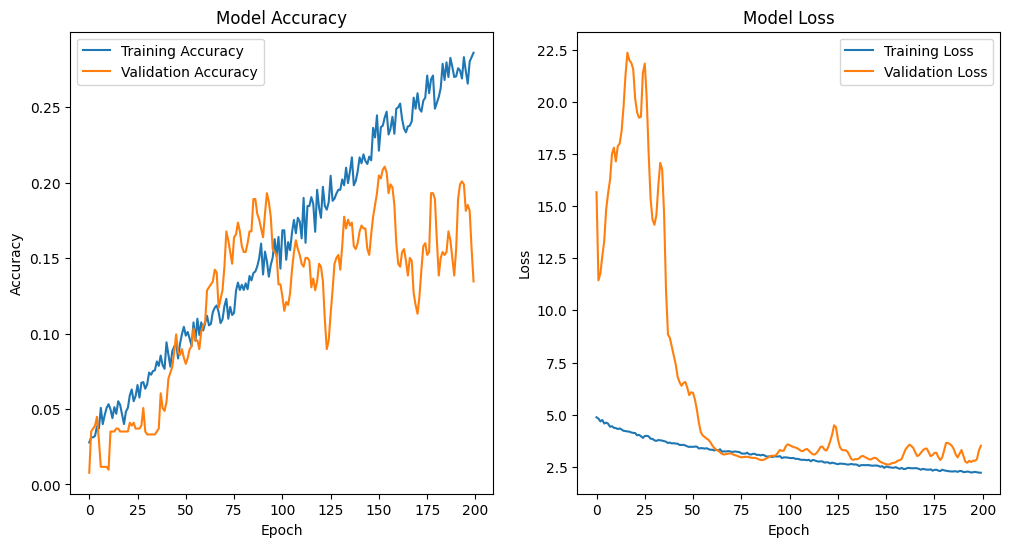

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
plt.show()


In [63]:
val_accuracies = history.history['val_accuracy']

best_val_accuracy = max(val_accuracies)

print(f"The best validation accuracy is: {best_val_accuracy * 100:.2f}%")

The best validation accuracy is: 21.05%


1/1 [==============================] - 0s 364ms/step


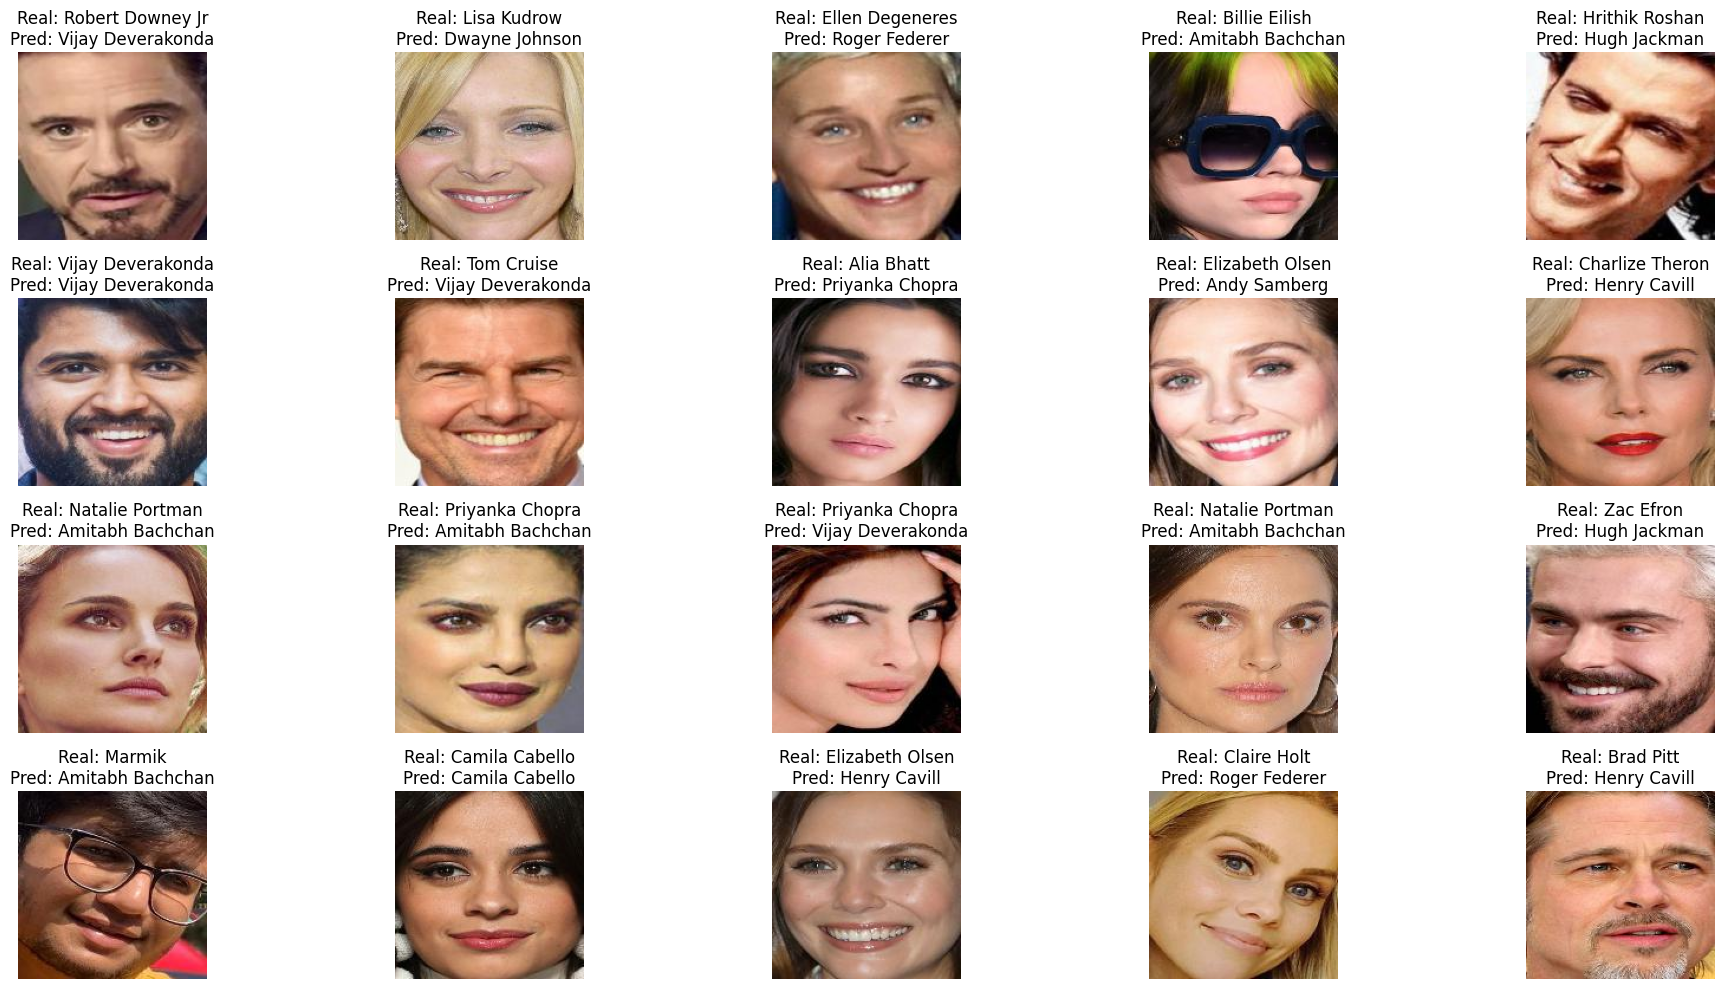

In [64]:
predictions = model.predict(x[:20])
predicted_labels = np.argmax(predictions, axis=1)
real_labels = np.argmax(y_label[:20], axis=1)

predicted_string_labels = [label_dict_reverse[label] for label in predicted_labels]
real_string_labels = [label_dict_reverse[label] for label in real_labels]

plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(cv2.cvtColor(x[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Real: {real_string_labels[i]}\nPred: {predicted_string_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()